In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("../data/processed_data/CREMP_OCTO_Summaries_2023_MeanHeight.csv")

C:\Users\Elite\AppData\Local\Temp\ipykernel_24448\3787216306.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Species', y='Mean Height', data=species_mean_height, palette='viridis')


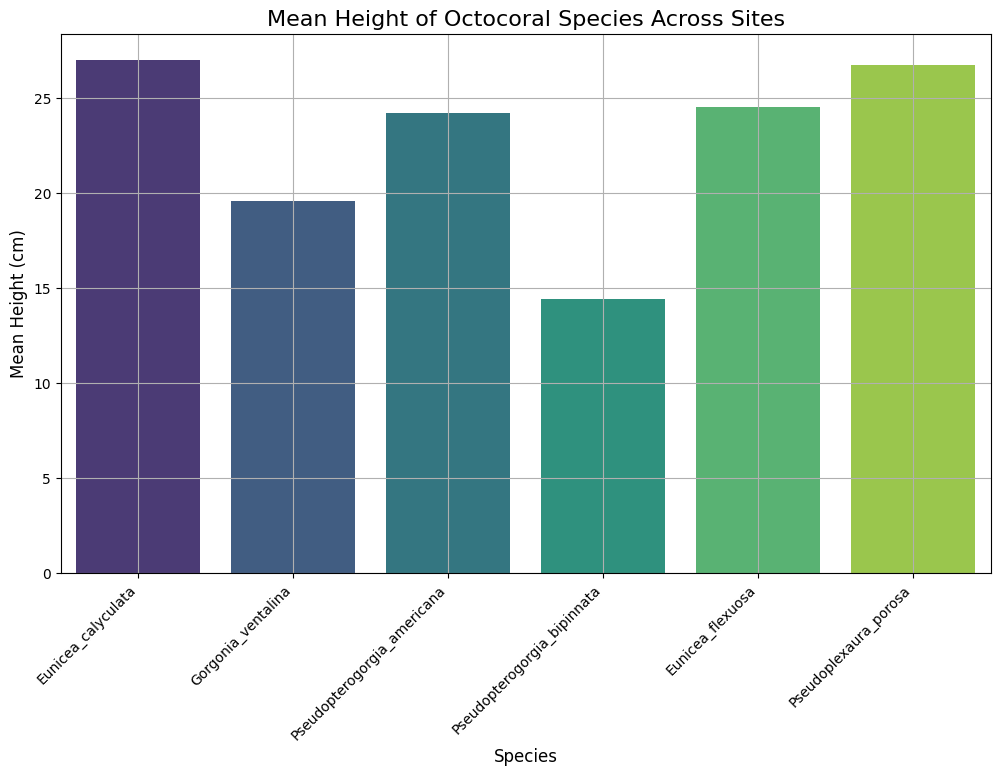

In [2]:
# 1. Mean Height of Species Across Sites (Bar Plot)
species_columns = ['Eunicea_calyculata', 'Gorgonia_ventalina', 'Pseudopterogorgia_americana', 
                   'Pseudopterogorgia_bipinnata', 'Eunicea_flexuosa', 'Pseudoplexaura_porosa']

# Calculate the mean height of each species across all sites
species_mean_height = data[species_columns].mean().reset_index(name='Mean Height')
species_mean_height.columns = ['Species', 'Mean Height']

plt.figure(figsize=(12, 7))
sns.barplot(x='Species', y='Mean Height', data=species_mean_height, palette='viridis')
plt.title('Mean Height of Octocoral Species Across Sites', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Mean Height (cm)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.savefig("../plots/octocoral_mean_height_per_site.png")
plt.show()
plt.close()

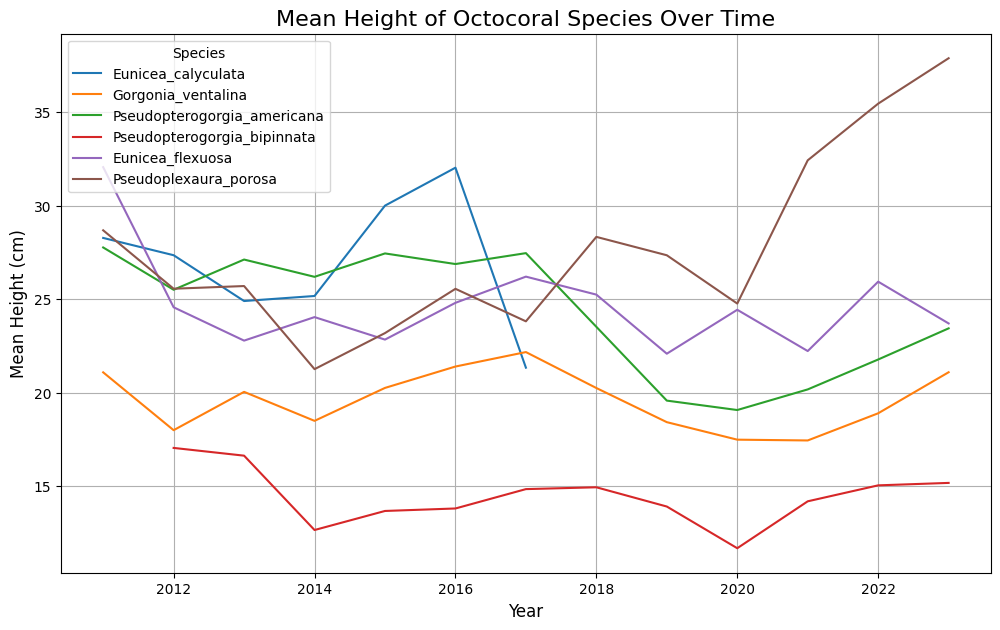

In [3]:
# 2. Mean Height Over Time for Species (Line Plot)
data['Date'] = pd.to_datetime(data['FirstOfDate'])
data['Year'] = data['Date'].dt.year

# Calculate the mean height of octocoral species over time
mean_height_over_time = data[['Year'] + species_columns].groupby('Year').mean().reset_index()

plt.figure(figsize=(12, 7))
for species in species_columns:
    sns.lineplot(x='Year', y=species, data=mean_height_over_time, label=species)
plt.title('Mean Height of Octocoral Species Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Height (cm)', fontsize=12)
plt.legend(title='Species')
plt.grid(True)
plt.savefig("../plots/octocoral_mean_height_over_time.png")
plt.show()
plt.close()

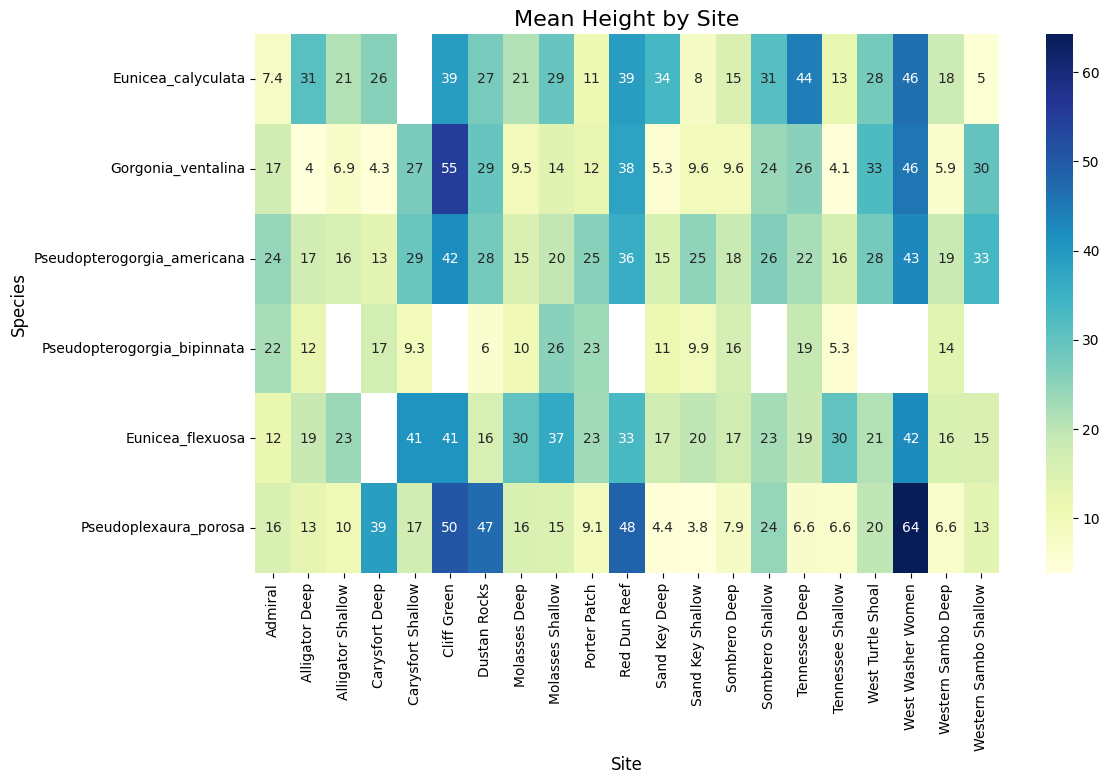

In [4]:
# 3. Mean Height by Site (Heatmap)
mean_height_by_site = data[species_columns].copy()
mean_height_by_site['Site'] = data['site_name']

# Create a heatmap of mean height by site
mean_height_by_site = mean_height_by_site.groupby('Site').mean().reset_index()
plt.figure(figsize=(12, 7))
sns.heatmap(mean_height_by_site.set_index('Site').T, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Mean Height by Site', fontsize=16)
plt.xlabel('Site', fontsize=12)
plt.ylabel('Species', fontsize=12)
plt.savefig("../plots/species_mean_height_by_site.png")
plt.show()
plt.close()